In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from pandas_profiling import ProfileReport
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
import pickle as pkl
plt.style.use('fivethirtyeight')


pd.set_option('display.max_columns', 500)

In [96]:
#Bring in our data
features = pkl.load(open('features.pkl','rb'))

m_orig = pd.read_csv('MathClassOriginal.csv')
m_orig = m_orig.drop('Unnamed: 0',axis =1)

p_orig = pd.read_csv('PortugeseClassOriginal.csv')
p_orig = p_orig.drop('Unnamed: 0',axis =1)

m = pd.read_csv('MathClassCleaned.csv')
m = m.drop('Unnamed: 0',axis =1)

p = pd.read_csv('PortugeseClassCleaned.csv')
p = p.drop('Unnamed: 0',axis =1)

p_feature = pd.read_csv('pFeatures.csv')
p_feature = p_feature.drop('Unnamed: 0',axis =1)

m_feature = pd.read_csv('mFeatures.csv')
m_feature= m_feature.drop('Unnamed: 0',axis =1)

test_p_feature = pd.read_csv('testP.csv')
test_p_feature = test_p_feature.drop('Unnamed: 0',axis =1)
test_p_feature['G3'] = p.G3

Making a correlation matrix

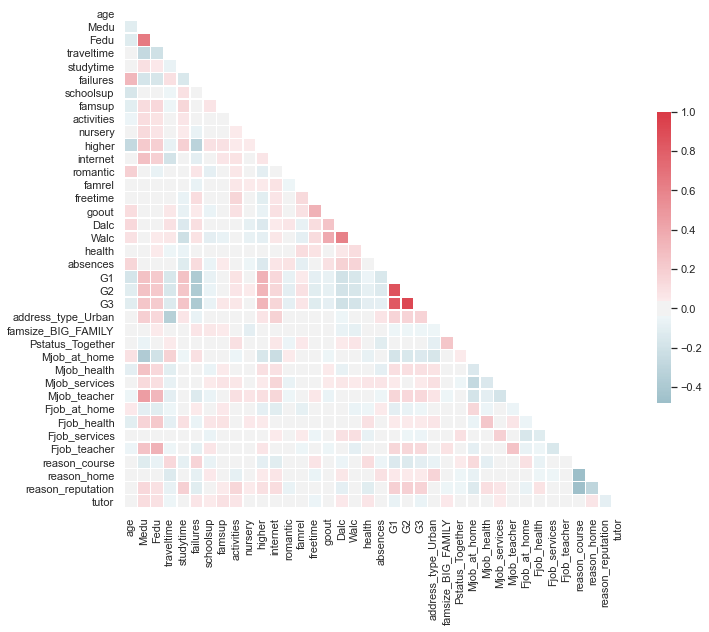

In [44]:
sns.set(style="white")

# Compute the correlation matrix
corr = p.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

means of students grades in math class by Fathers education level and Mothers education level in both math and portugese

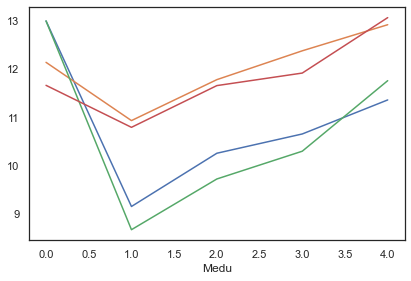

In [49]:
m.groupby('Fedu')['G3'].mean().plot()
p.groupby('Fedu')['G3'].mean().plot()
m.groupby('Medu')['G3'].mean().plot()
p.groupby('Medu')['G3'].mean().plot()

means of students grades grouped by failures in math and portugese

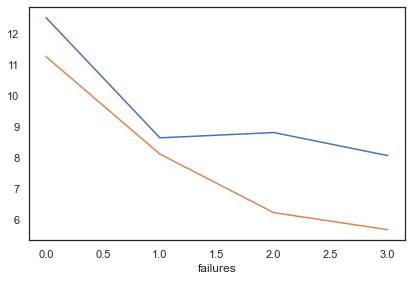

In [50]:
p.groupby('failures')['G3'].mean().plot()
m.groupby('failures')['G3'].mean().plot()

distribution of those falures

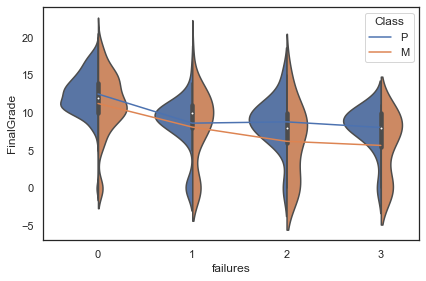

In [82]:
JointFailData = list(p.failures)
JointGradeData = list(p.G3)
JointClassType = ['P' for x in JointFailData]
mathtuples = list(zip(list(m.failures),list(m.G3)))
# plt.show()
JointFailData
mathtuples
for i,v in mathtuples:
    JointFailData.append(i)
    JointGradeData.append(v)
    JointClassType.append('M')
jointlist = list(zip(JointFailData,JointGradeData,JointClassType))

jointdf = pd.DataFrame(data = jointlist, columns = ['Failures','FinalGrade','Class'])
jointdf
ax = sns.violinplot(x="Failures", y="FinalGrade", hue="Class", split=True, data=jointdf)
p.groupby('failures')['G3'].mean().plot()
m.groupby('failures')['G3'].mean().plot()

box plots for grade by studytime

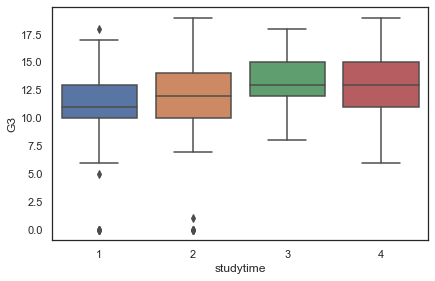

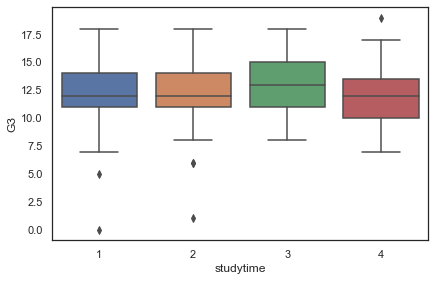

In [57]:
sns.boxplot(p.studytime, p.G3)
plt.show()
sns.boxplot(m.studytime, p.G3)

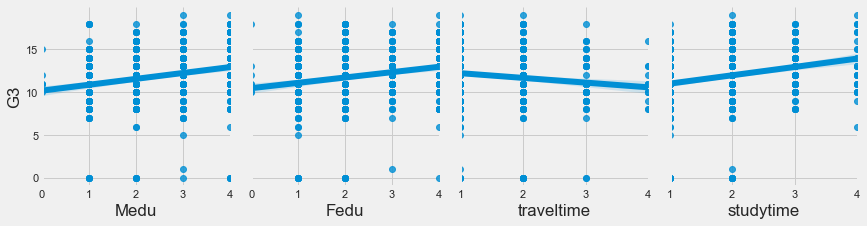

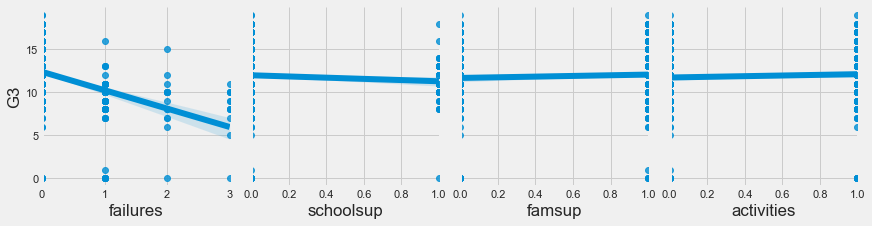

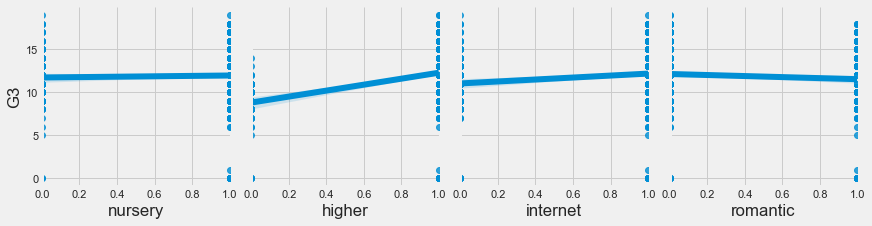

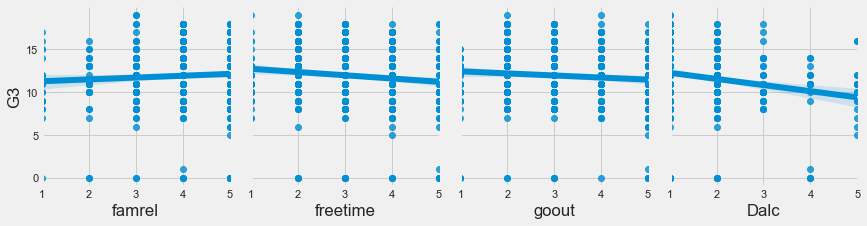

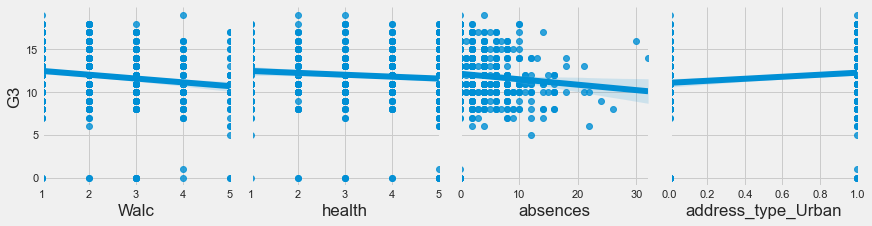

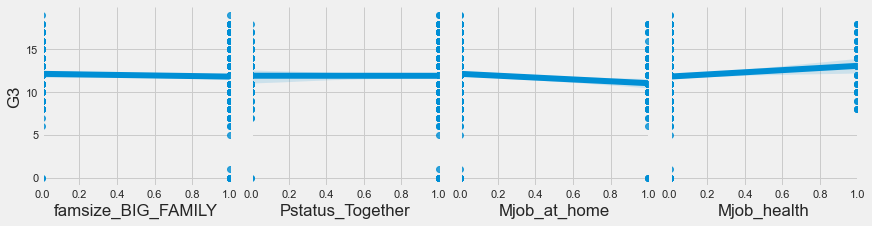

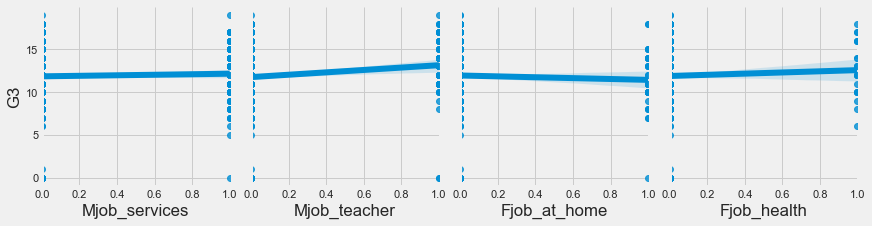

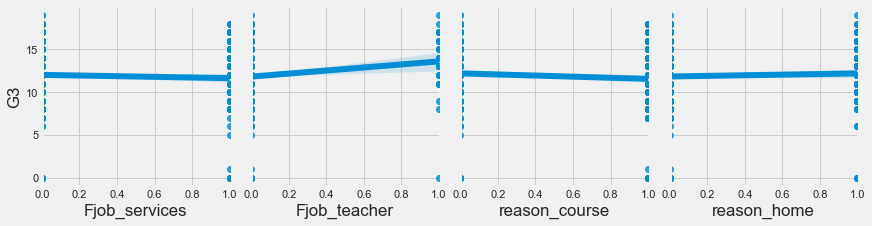

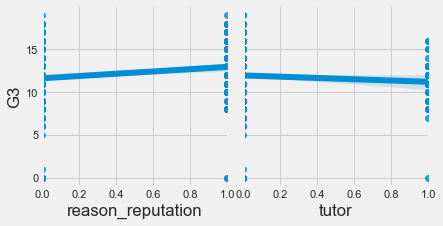

In [86]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=p, y_vars=['G3'],x_vars=i, kind="reg", height=3)

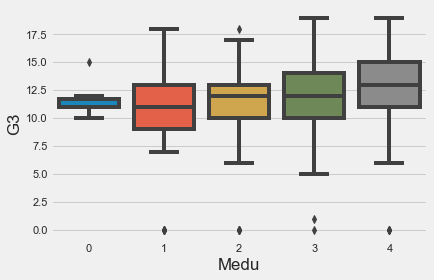

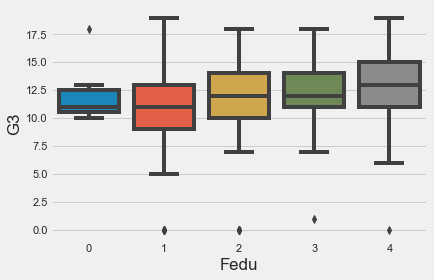

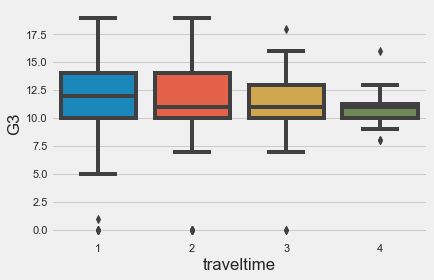

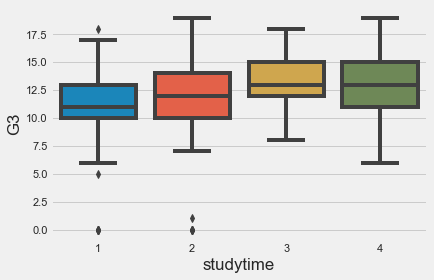

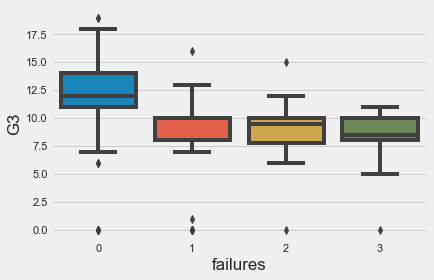

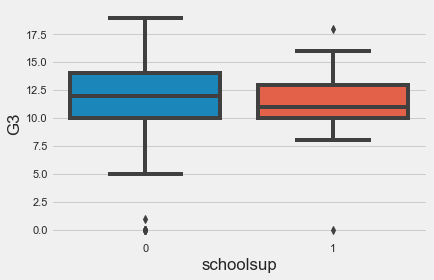

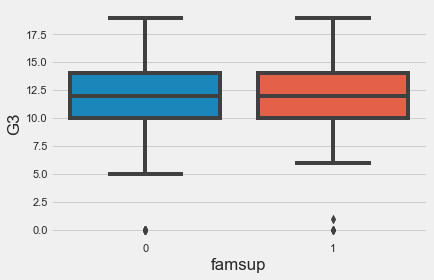

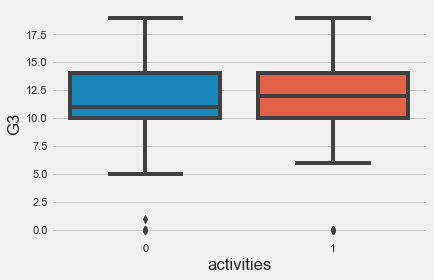

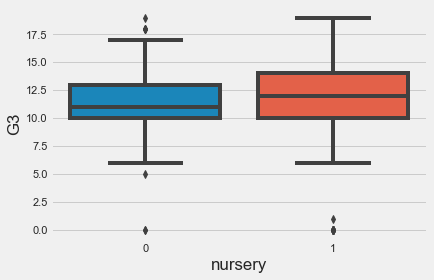

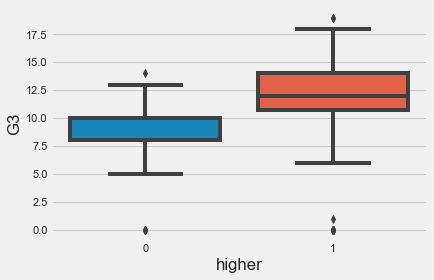

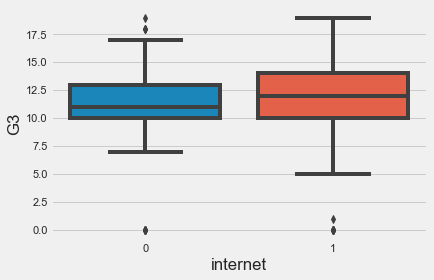

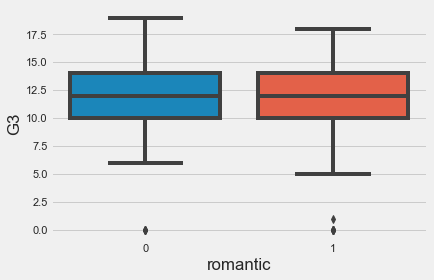

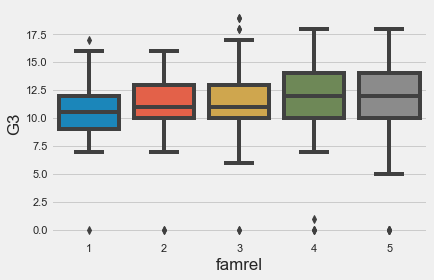

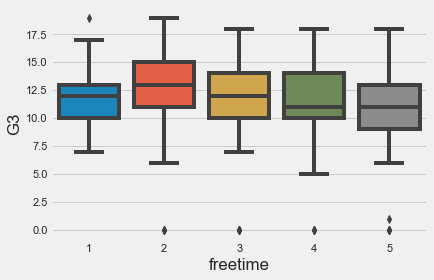

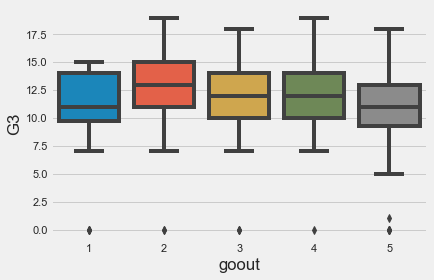

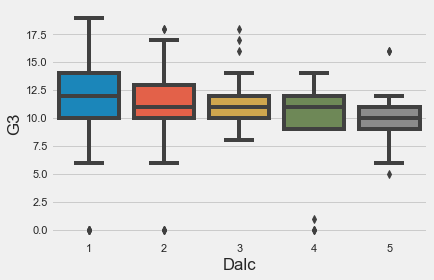

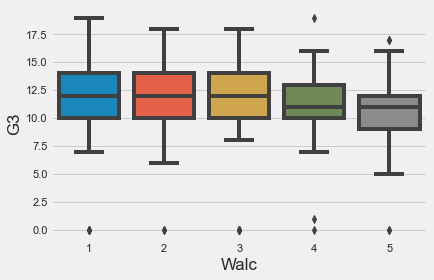

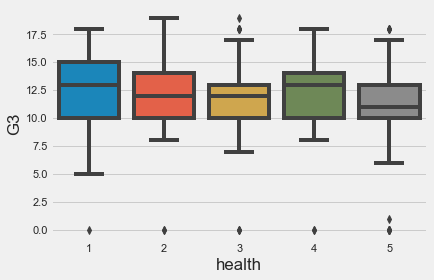

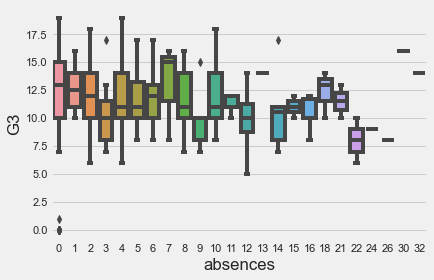

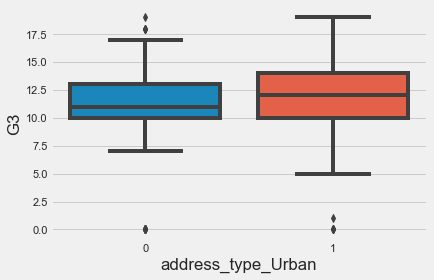

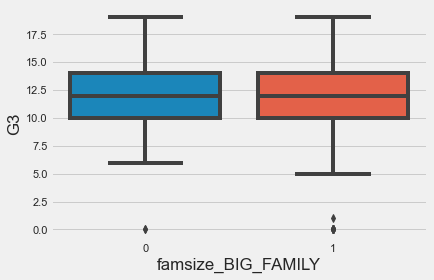

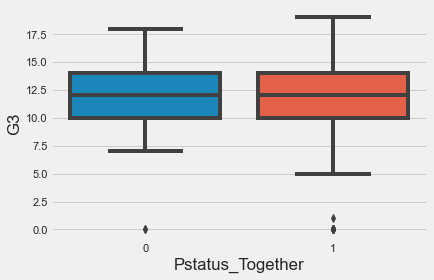

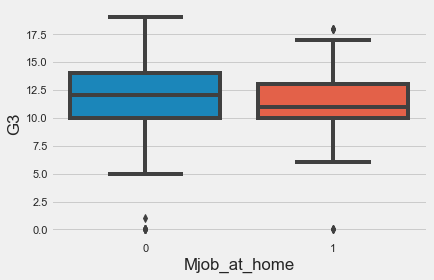

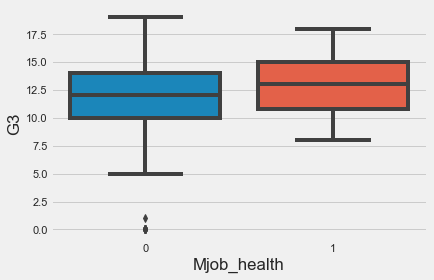

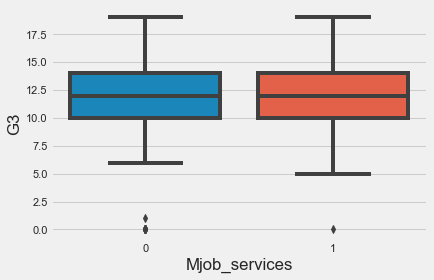

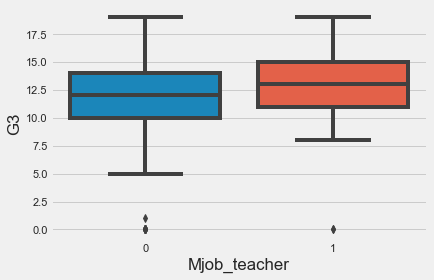

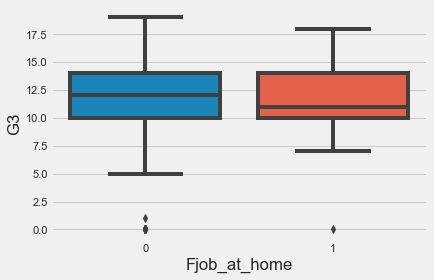

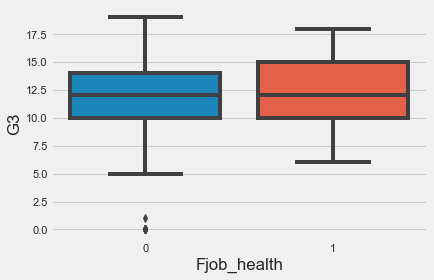

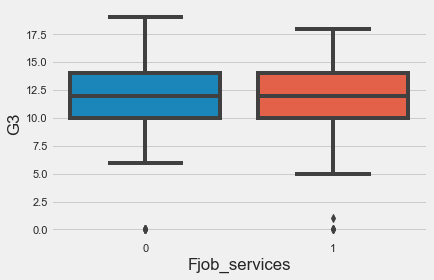

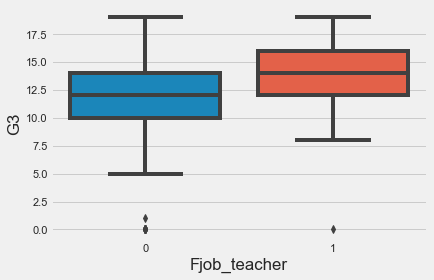

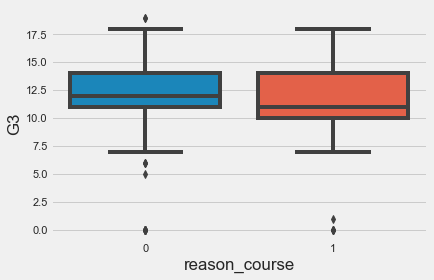

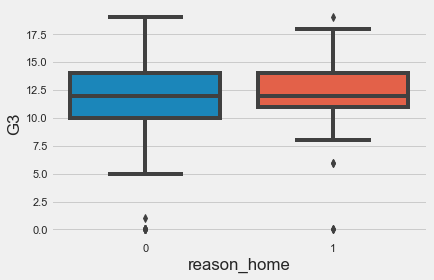

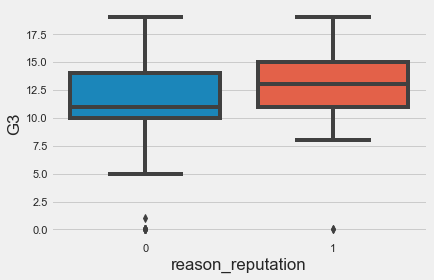

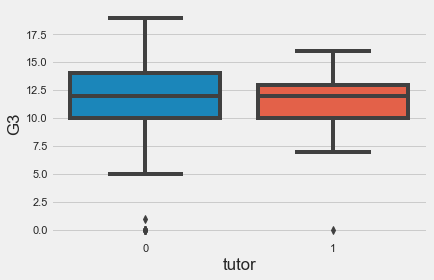

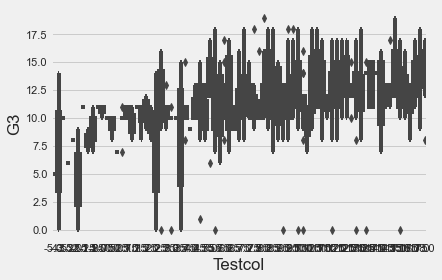

In [87]:
for i in p_feature:
    x = p_feature[i]
    sns.boxplot(x=x, y=p.G3)
    plt.show()

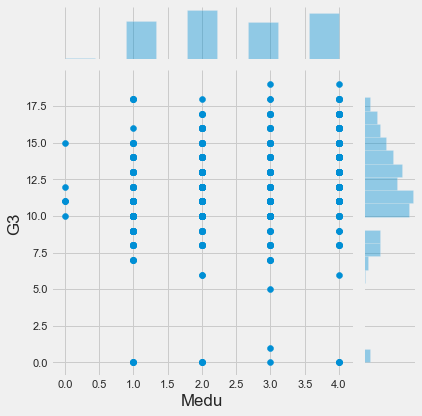

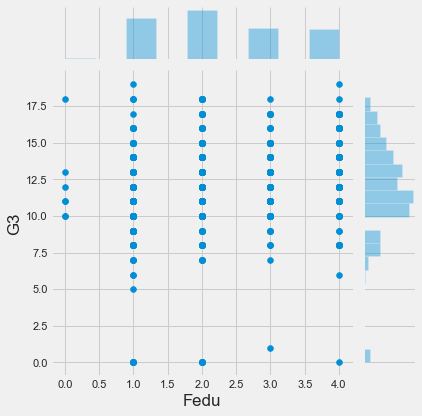

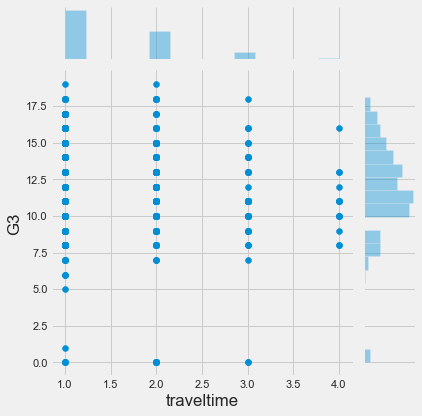

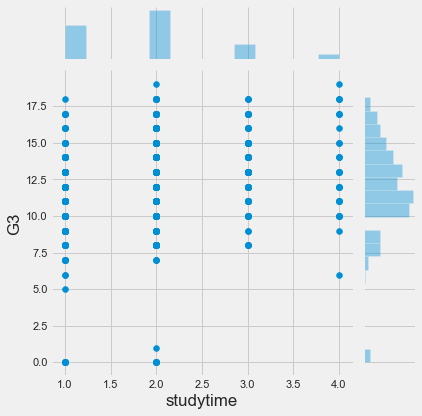

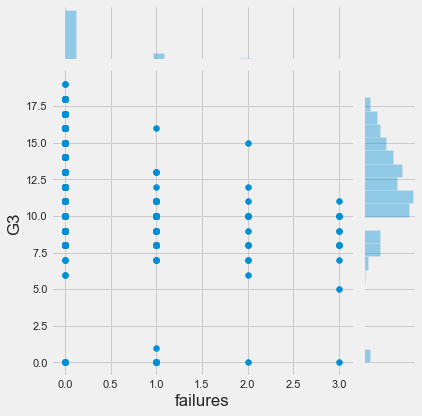

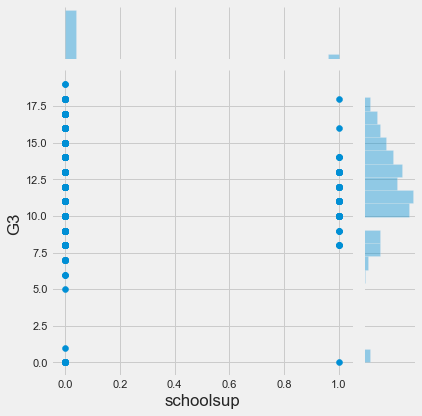

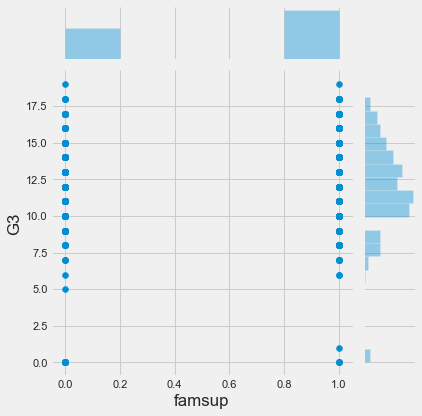

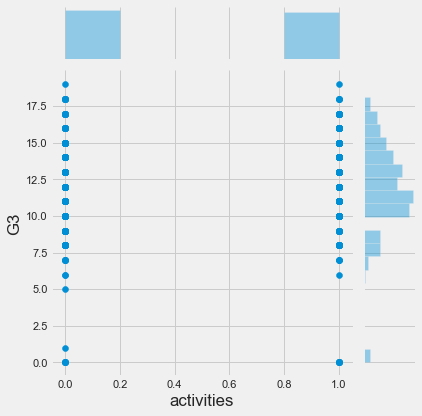

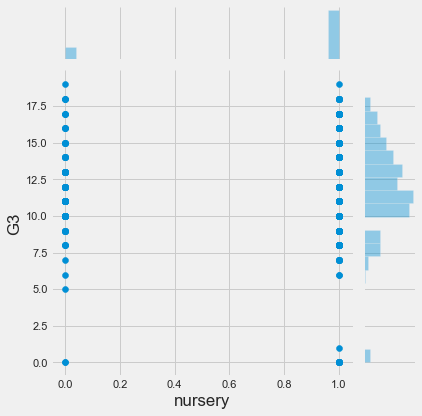

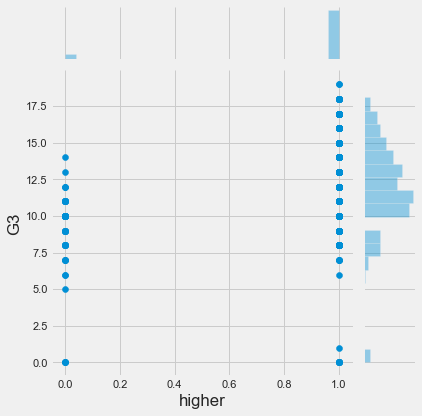

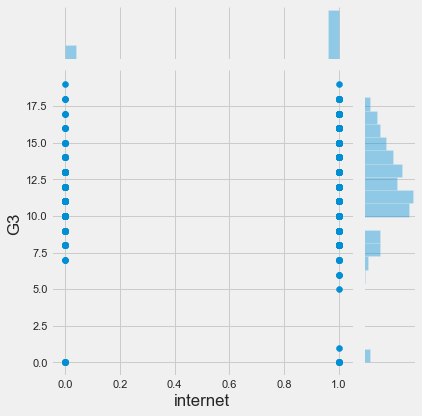

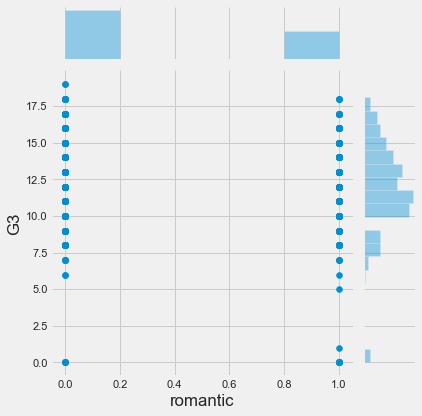

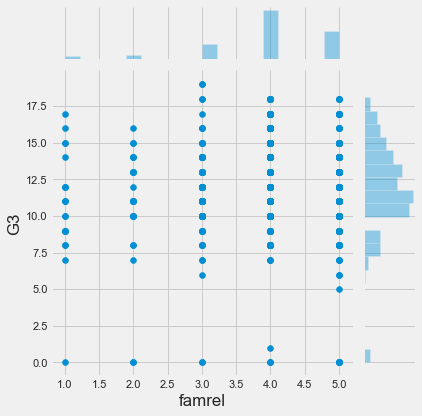

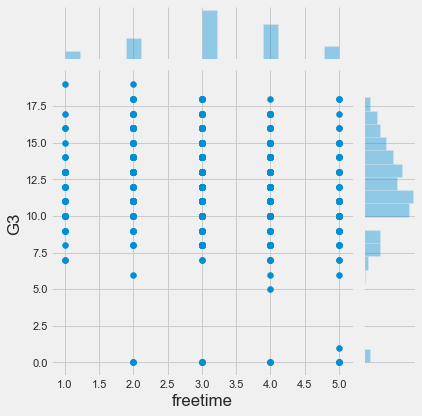

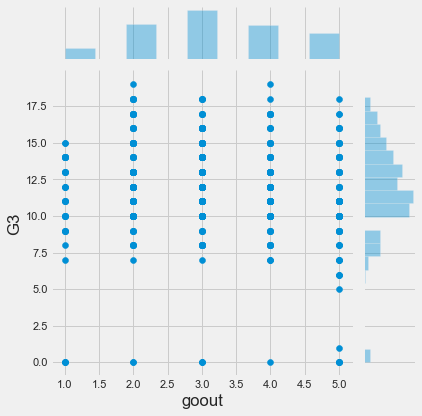

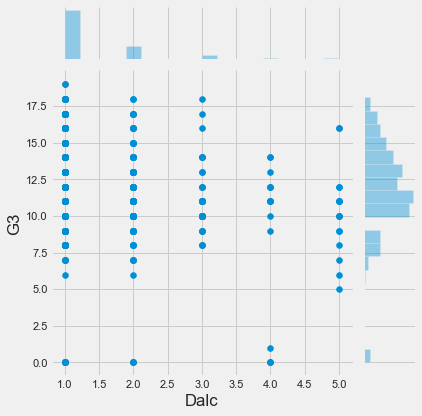

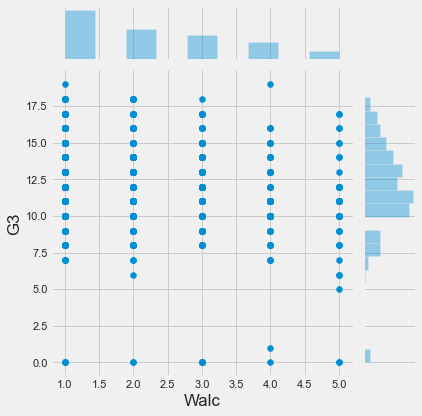

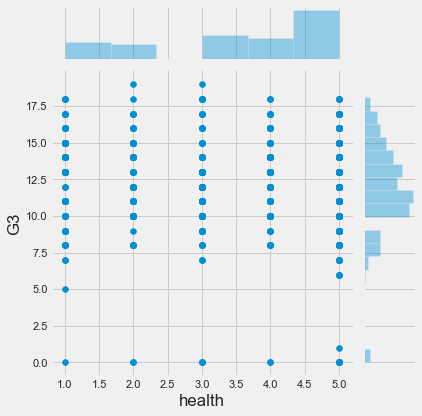

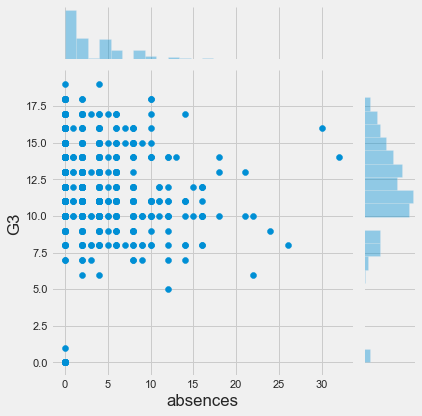

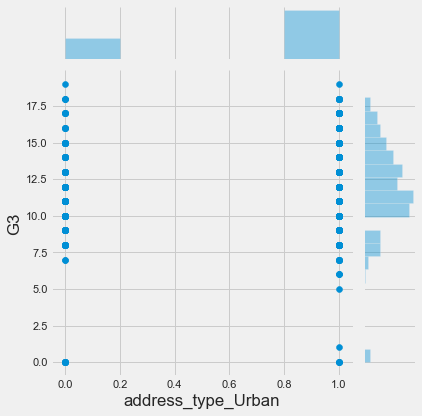

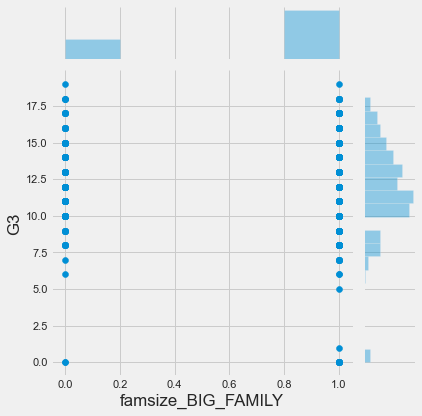

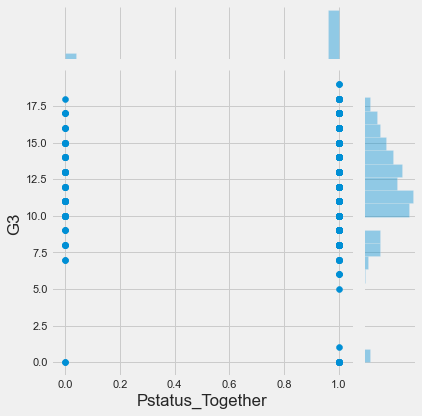

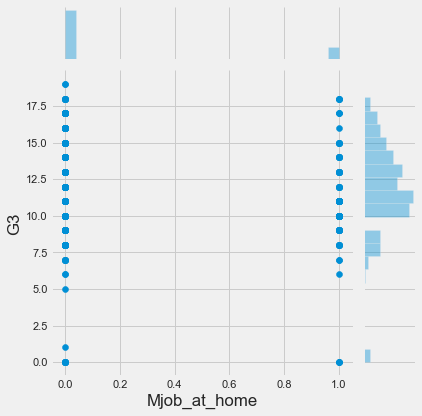

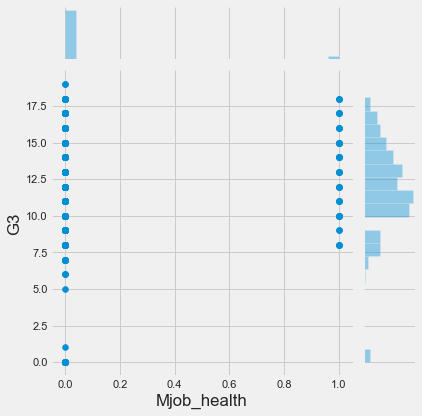

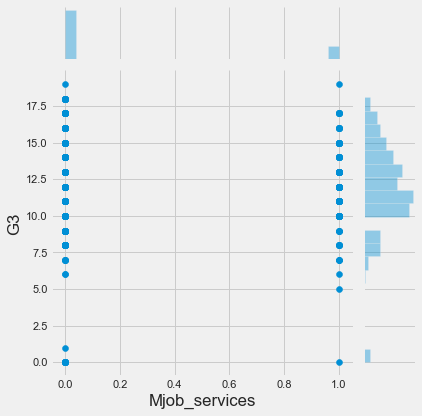

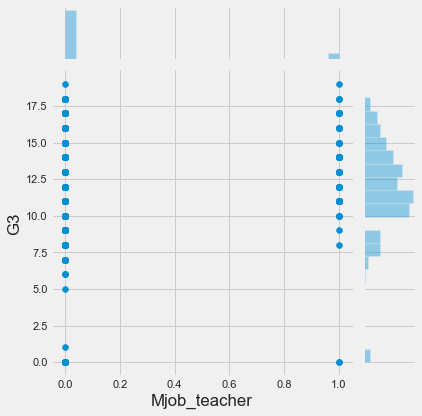

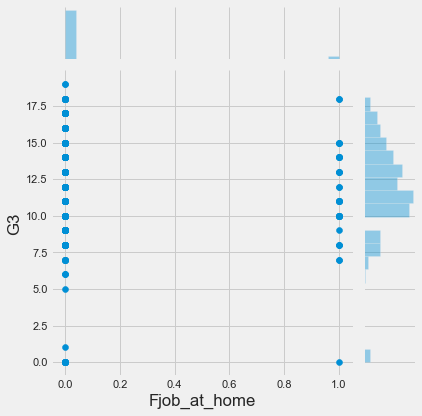

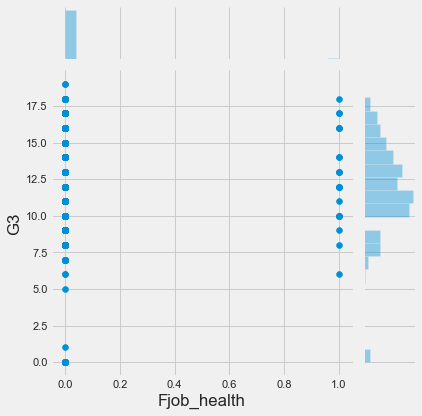

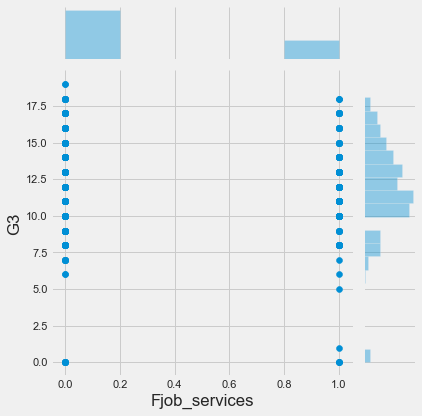

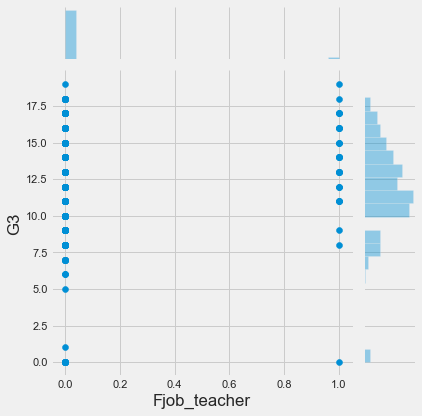

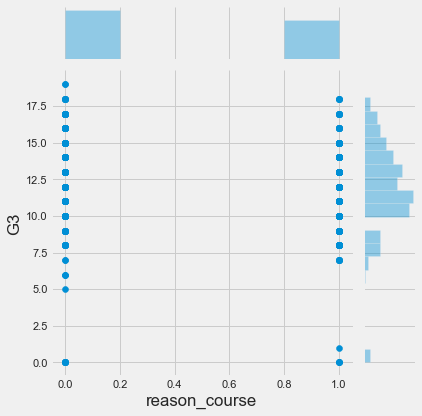

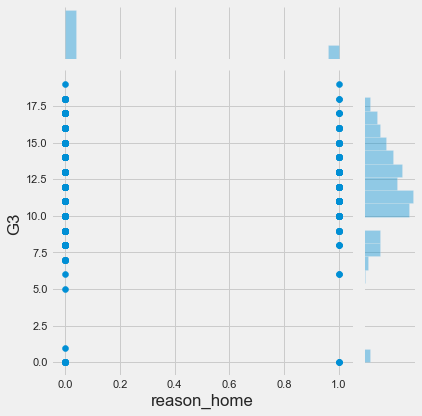

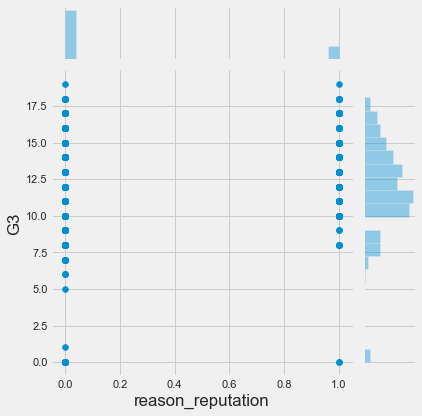

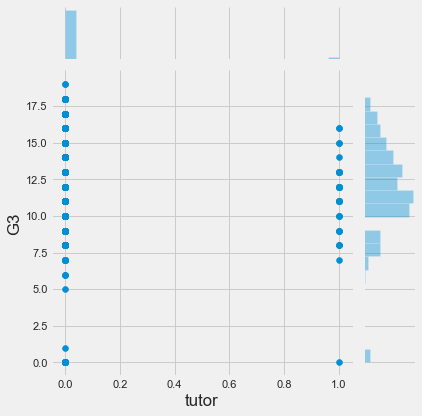

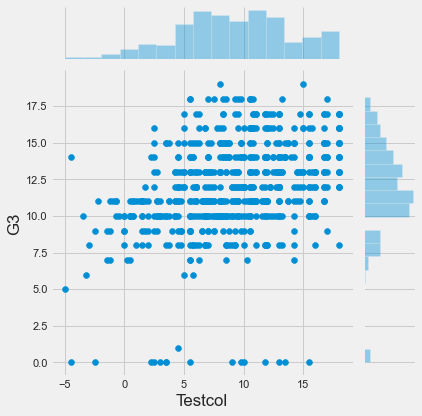

In [88]:
for i in p_feature:
    x = p_feature[i]
    sns.jointplot(x=x, y=p.G3)
    plt.show()

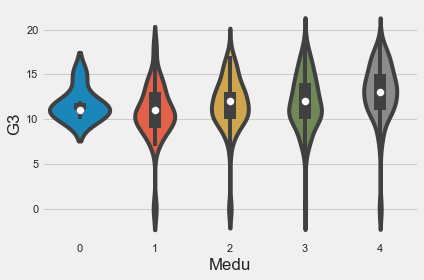

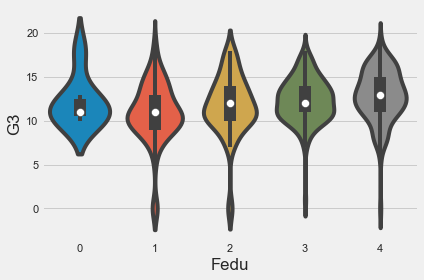

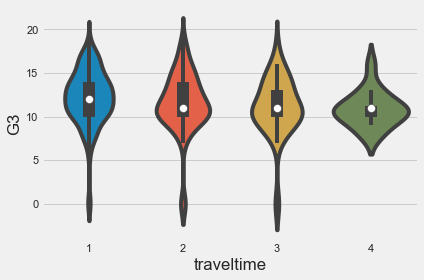

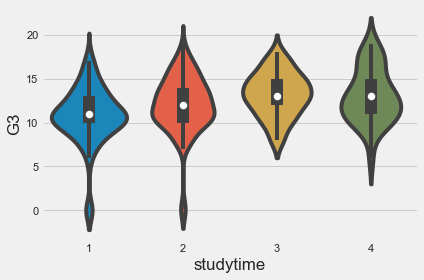

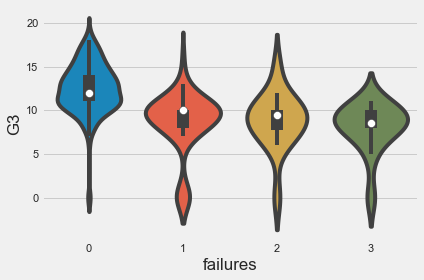

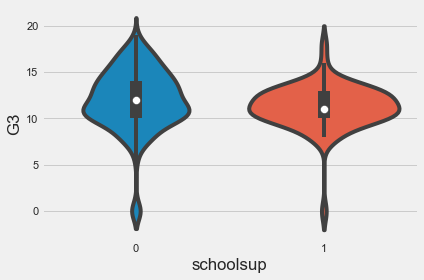

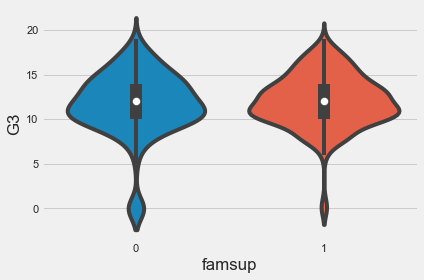

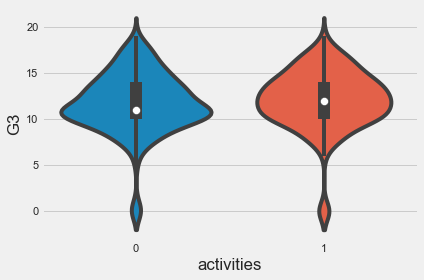

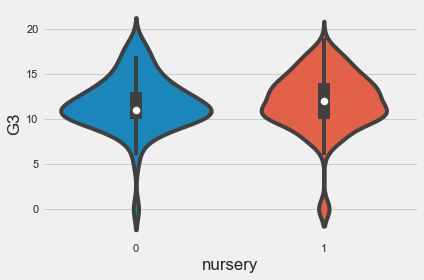

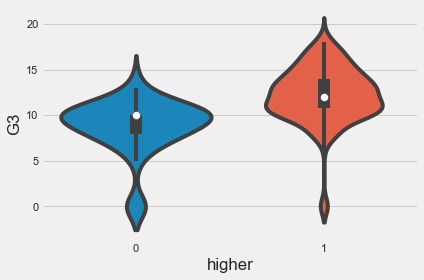

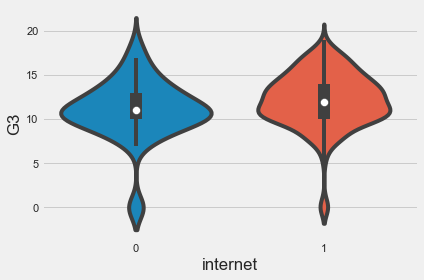

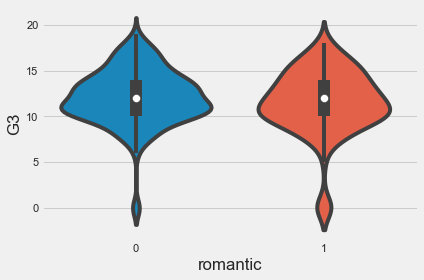

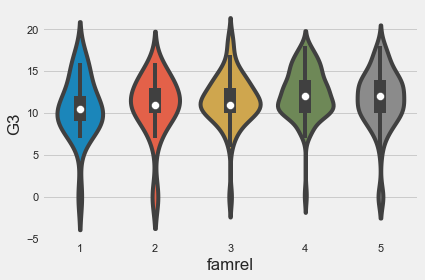

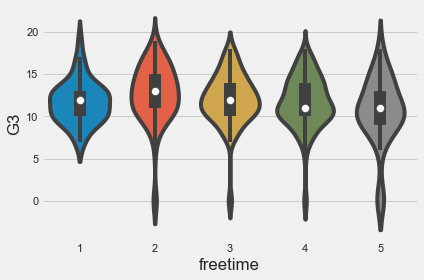

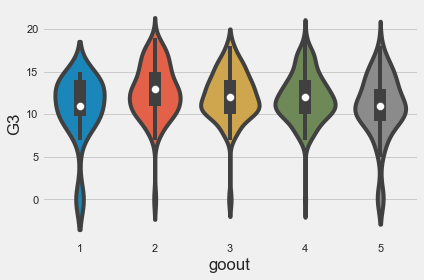

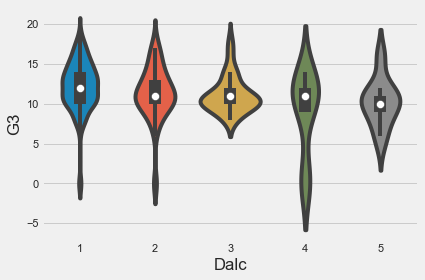

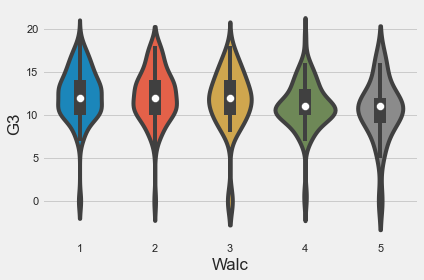

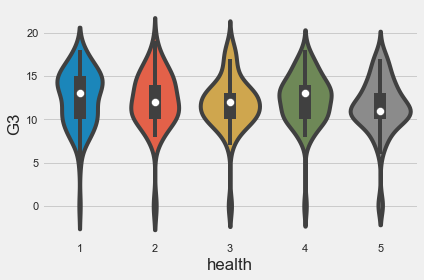

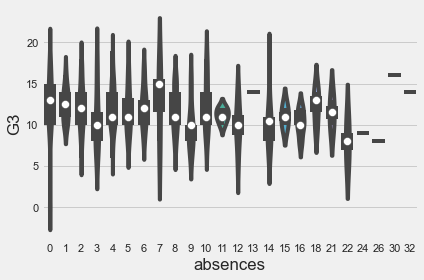

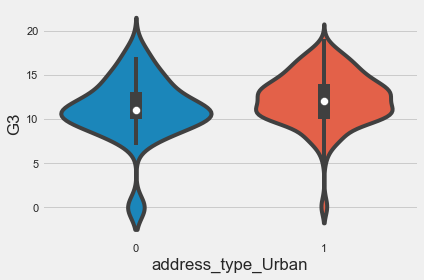

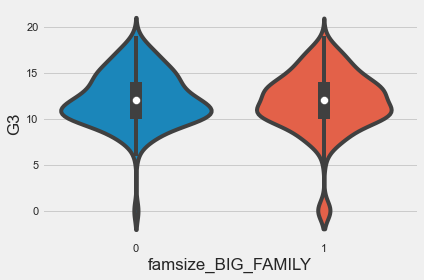

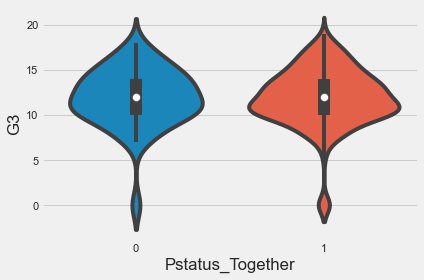

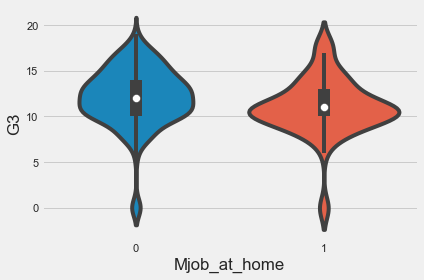

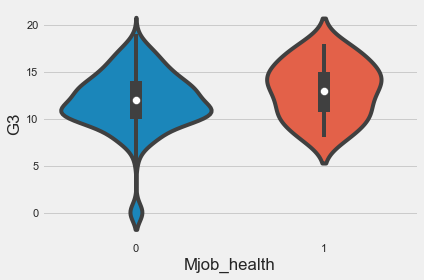

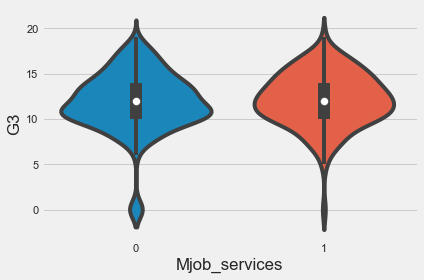

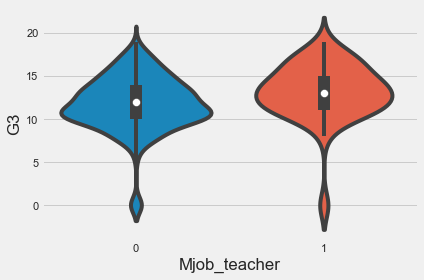

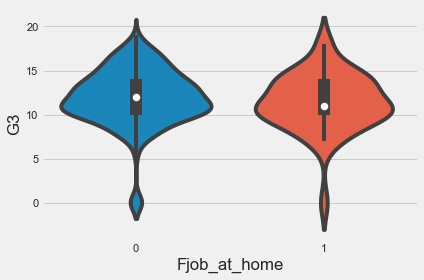

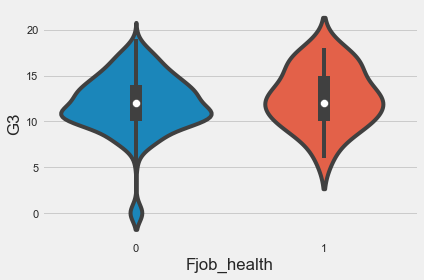

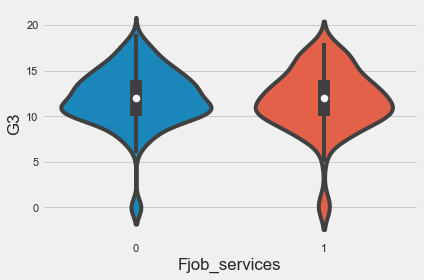

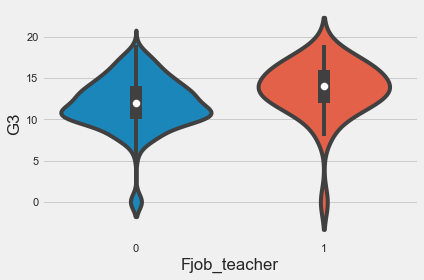

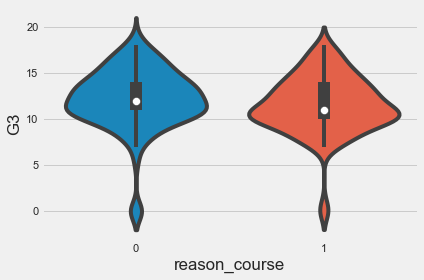

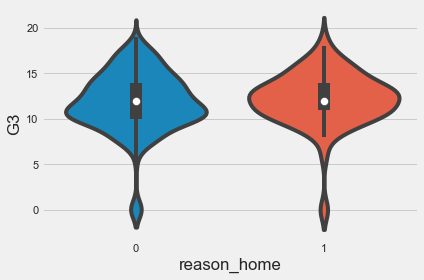

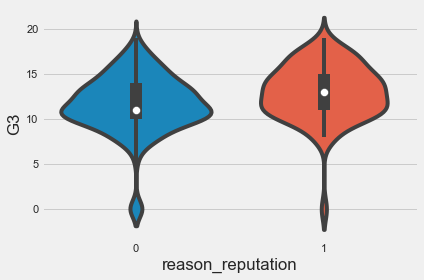

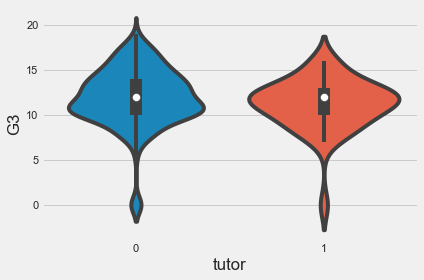

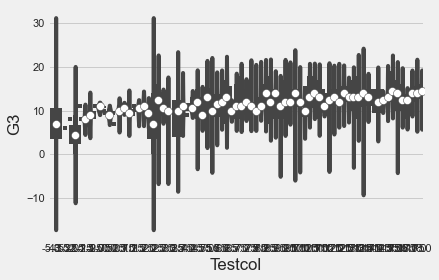

In [89]:
for i in p_feature:
    x = p_feature[i]
    sns.violinplot(x=x, y=p.G3)
    plt.show()

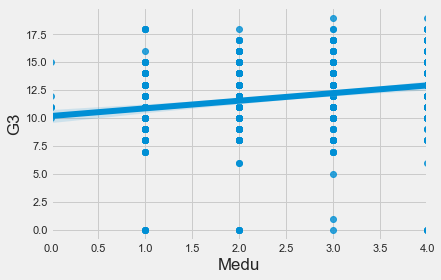

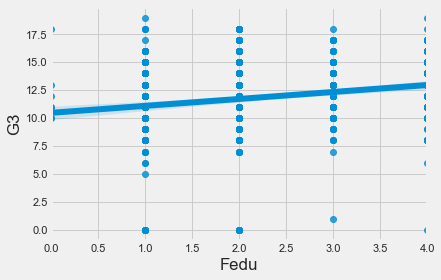

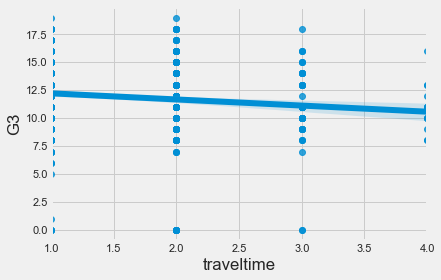

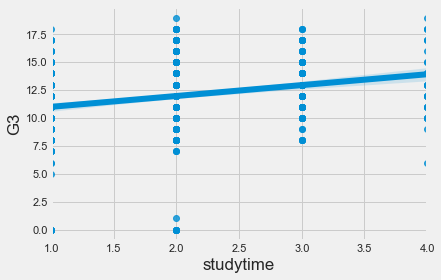

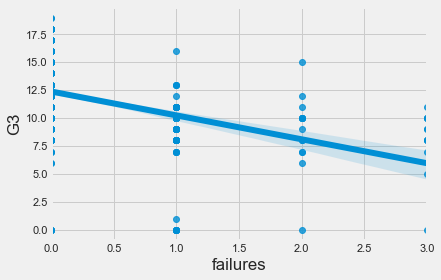

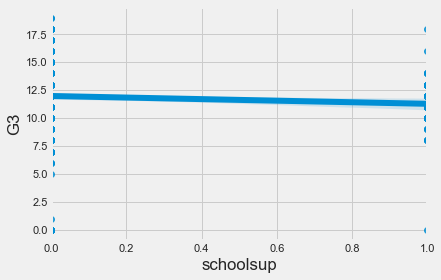

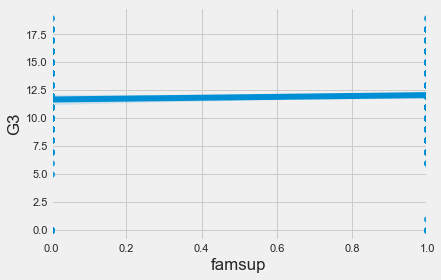

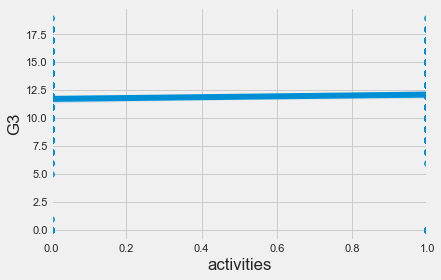

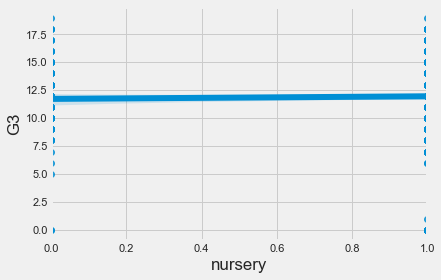

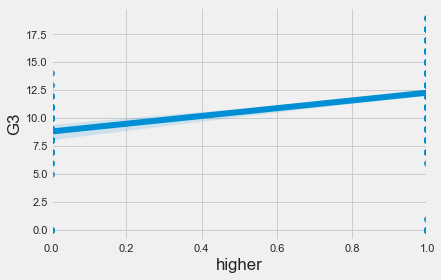

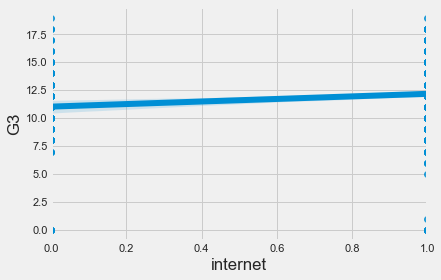

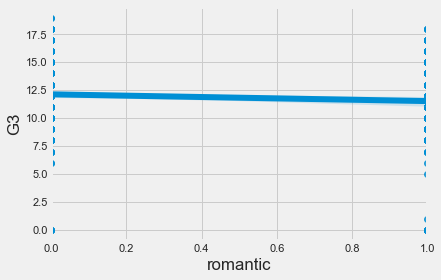

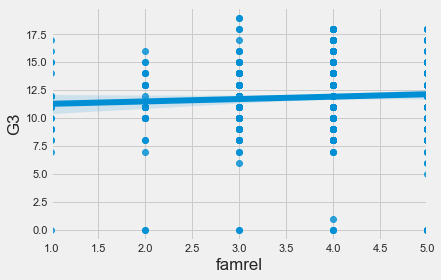

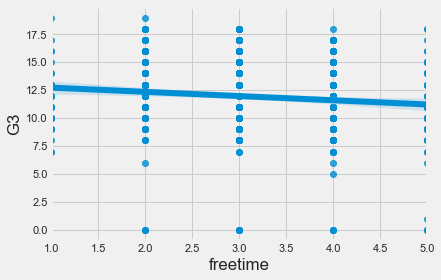

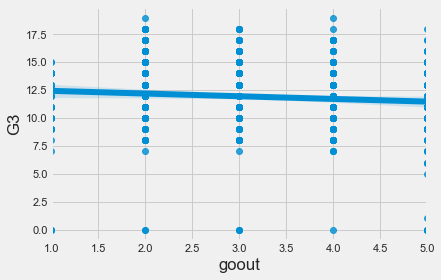

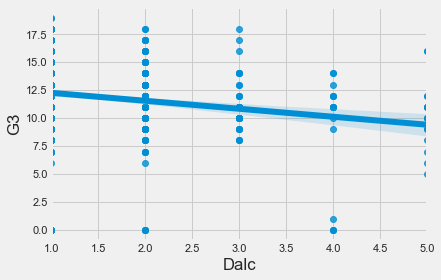

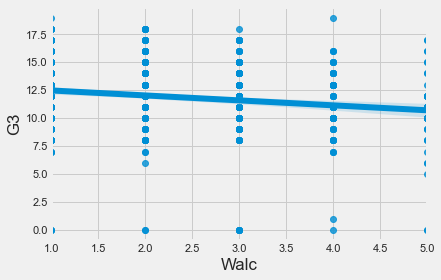

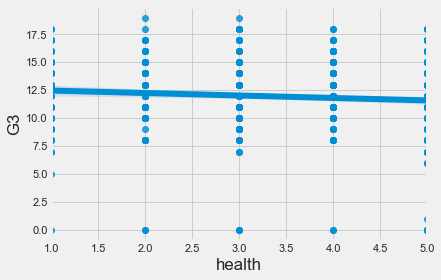

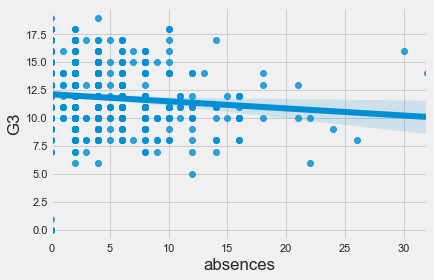

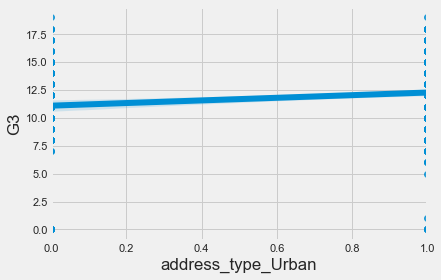

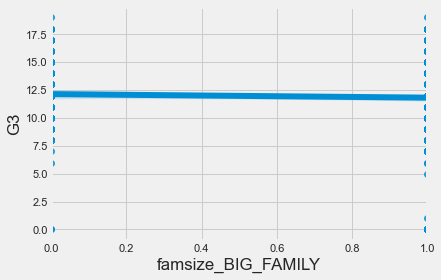

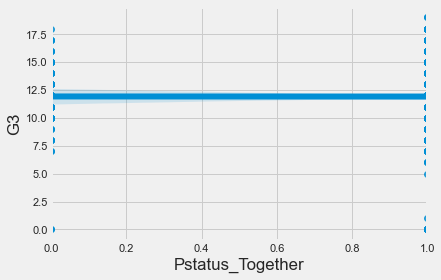

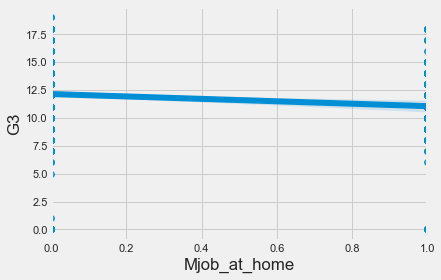

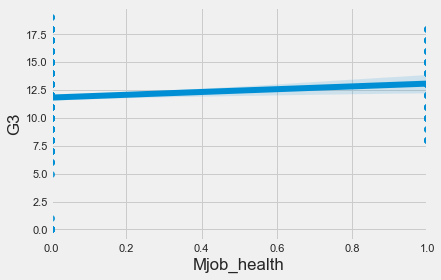

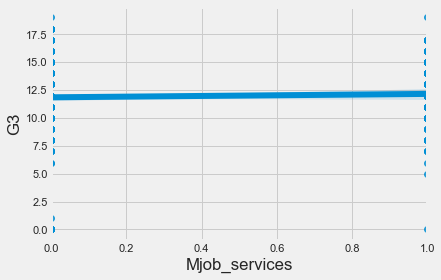

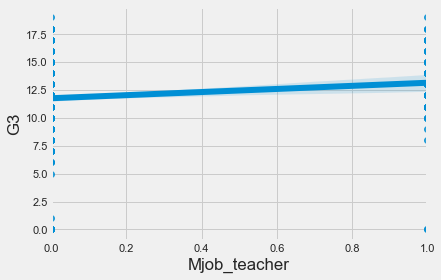

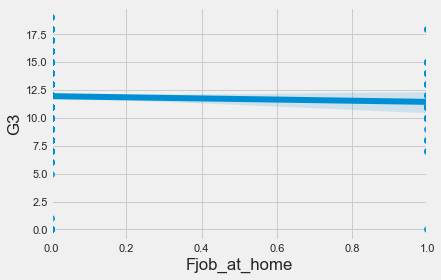

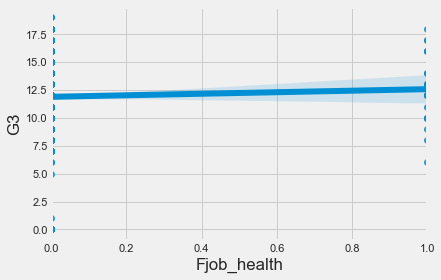

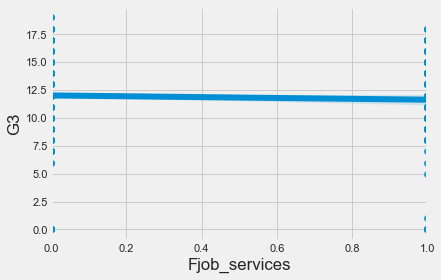

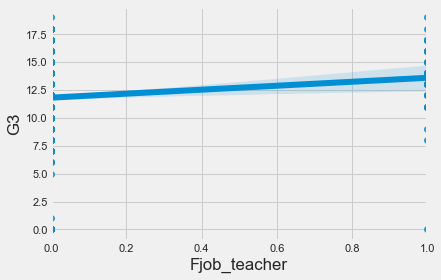

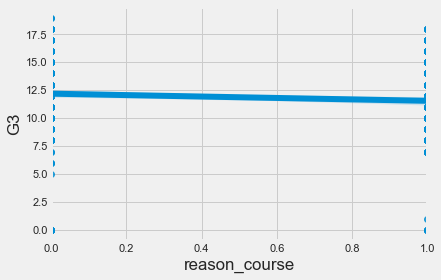

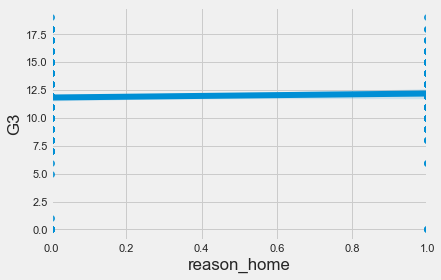

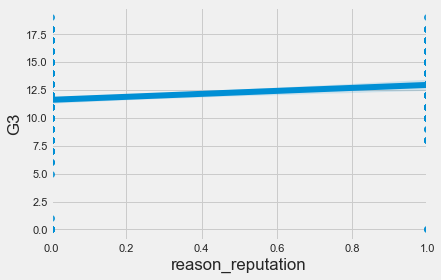

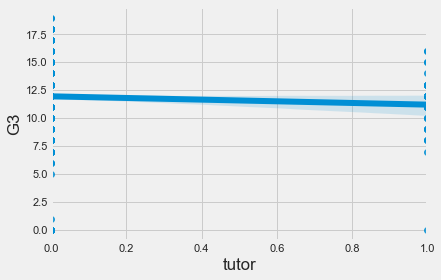

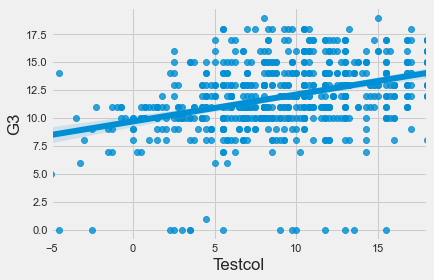

In [90]:
for i in p_feature:
    x = p_feature[i]
    sns.regplot(x=x, y=p.G3)
    plt.show()

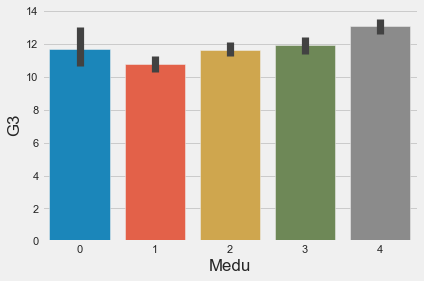

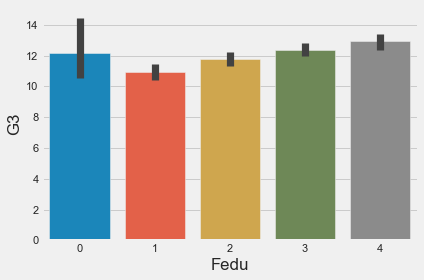

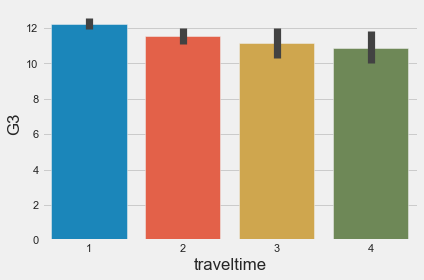

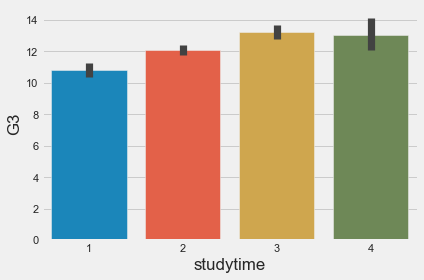

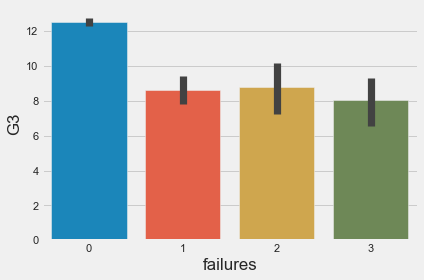

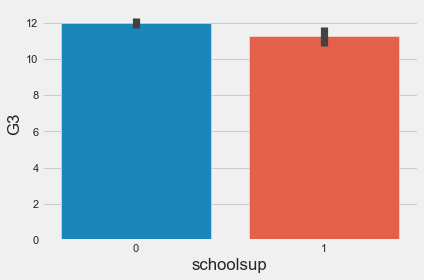

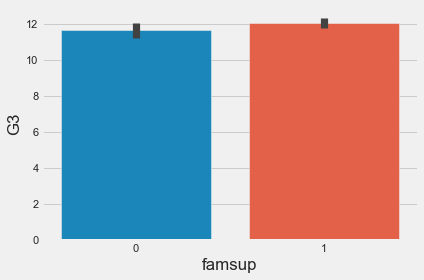

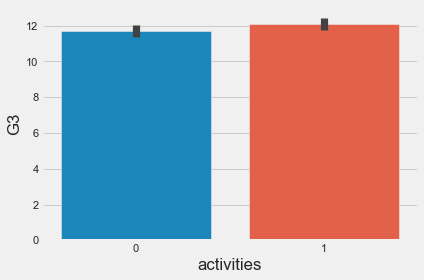

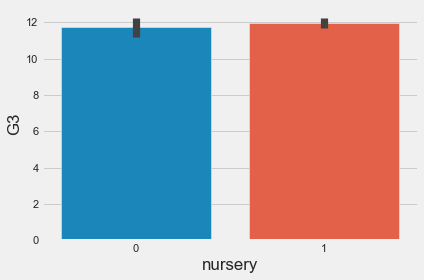

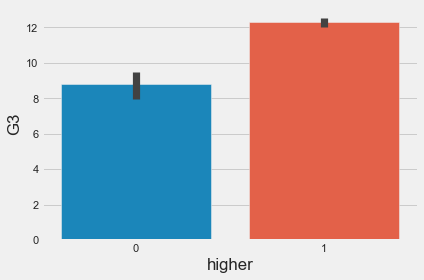

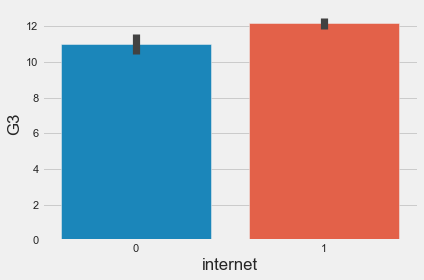

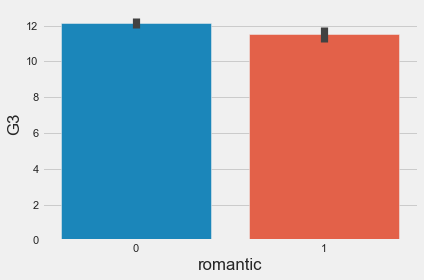

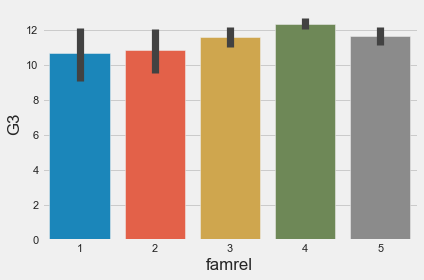

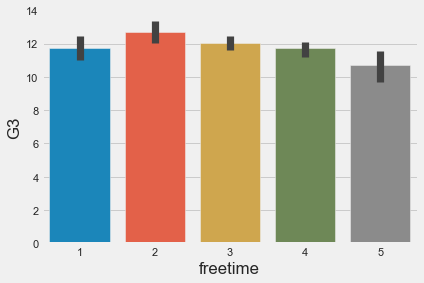

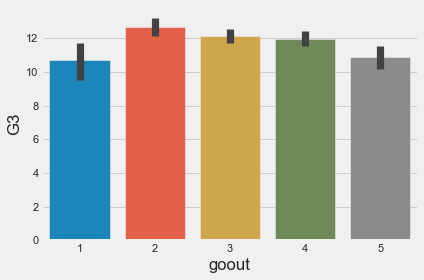

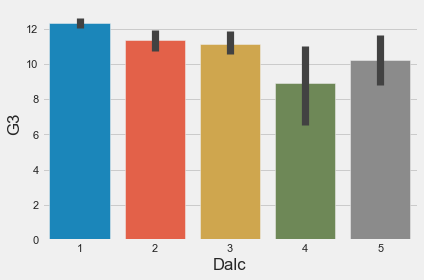

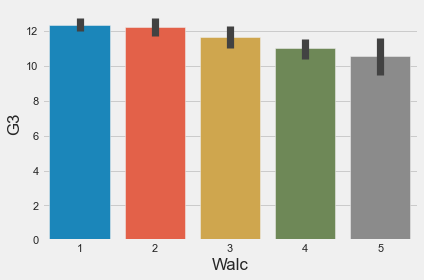

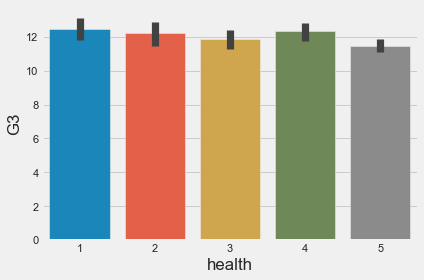

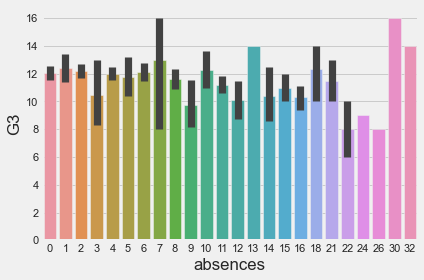

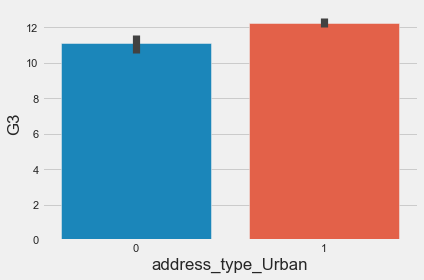

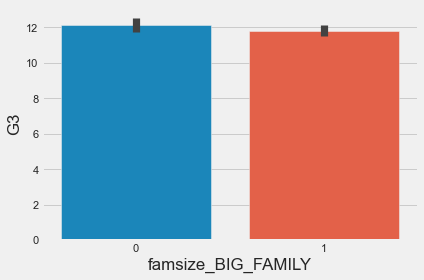

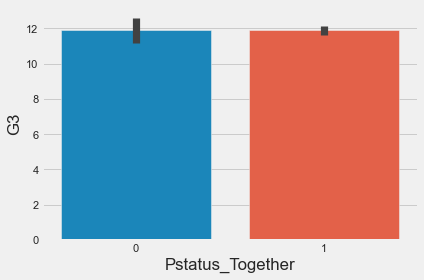

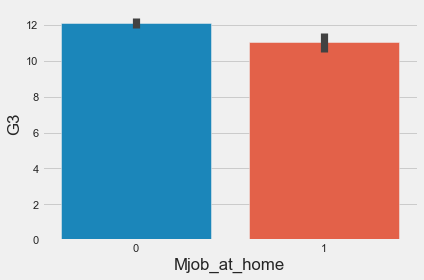

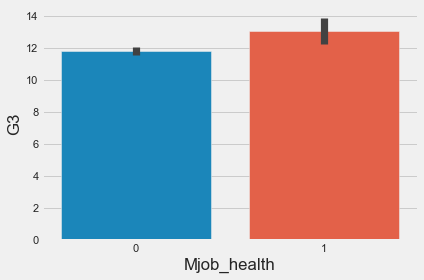

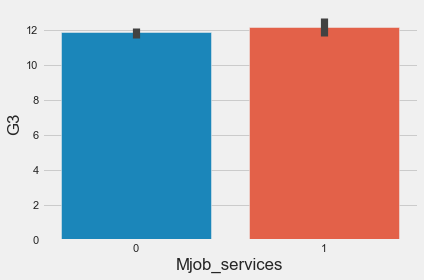

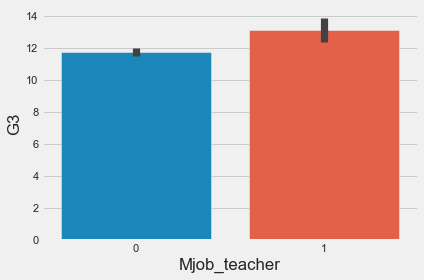

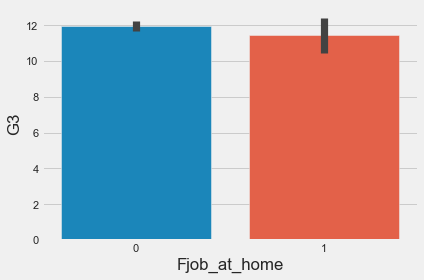

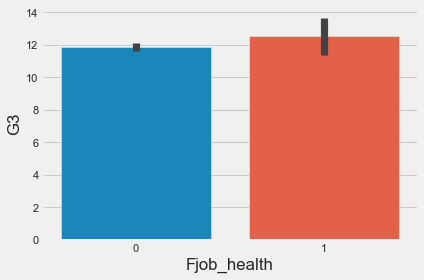

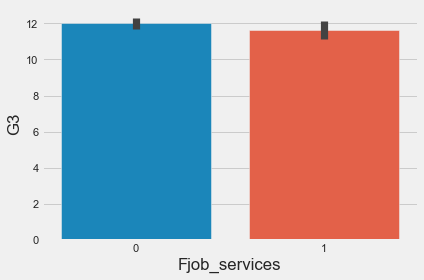

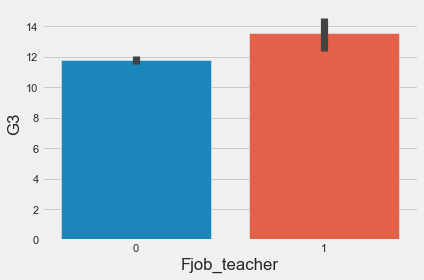

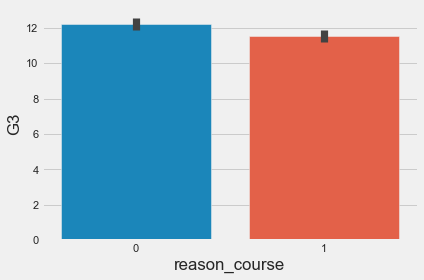

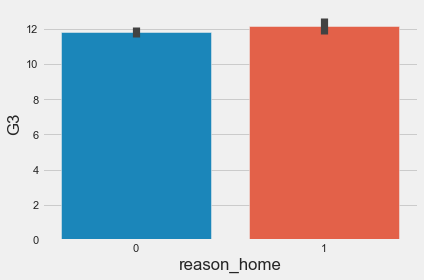

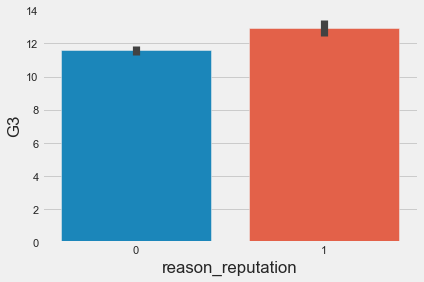

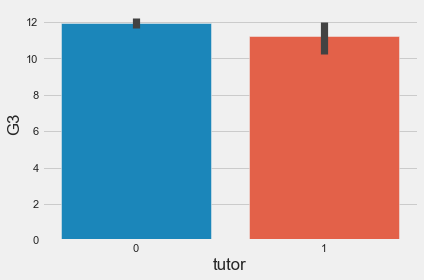

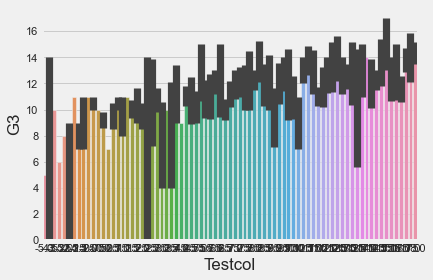

In [91]:
for i in p_feature:
    x = p_feature[i]
    sns.barplot(x=x, y=p.G3)
    plt.show()

In [97]:
model = ols(data = test_p_feature, formula='G3~studytime+failures+schoolsup+higher+freetime+Dalc+Walc+health+address_type_Urban+Pstatus_Together+Mjob_health+Mjob_services+Mjob_teacher+Fjob_health+Fjob_services+reason_course+reason_home+reason_reputation+Testcol').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     15.14
Date:                Sat, 12 Sep 2020   Prob (F-statistic):           3.30e-40
Time:                        14:08:26   Log-Likelihood:                -1559.3
No. Observations:                 649   AIC:                             3159.
Df Residuals:                     629   BIC:                             3248.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.6818      0.766     12.644      0.000       8.178      11.185
studytime              0.4990      0.138      3.627      0.000       0.229       0.769
failures              -1.4759      0.194     -7.593      0.000      -1.858      -1.094
schoolsup             -1.0327      0.356     -2.897      0.004      -1.733      -0.333
higher                 1.4407      0.428      3.369      0.001       0.601       2.280
freetime              -0.1881      0.105     -1.795      0.073      -0.394       0.018
Dalc                  -0.1732      0.153     -1.131      0.259      -0.474       0.128
Walc                  -0.0883      0.114     -0.772      0.440      -0.313       0.136
health                -0.1647      0.076     -2.157      0.031      -0.315      -0.015
address_type_Urban     0.6821      0.242      2.819      0.005       0.207       1.157
Pstatus_Together       0.2191      0.330      0.664      0.507      -0.428       0.867
Mjob_health            0.9361      0.452      2.072      0.039       0.049       1.823
Mjob_services          0.5029      0.290      1.737      0.083      -0.066       1.071
Mjob_teacher           0.7156      0.390      1.836      0.067      -0.050       1.481
Fjob_health           -0.5564      0.615     -0.905      0.366      -1.764       0.651
Fjob_services         -0.5740      0.250     -2.295      0.022      -1.065      -0.083
reason_course          0.6788      0.367      1.850      0.065      -0.042       1.399
reason_home            0.7810      0.400      1.953      0.051      -0.004       1.566
reason_reputation      1.1306      0.409      2.761      0.006       0.327       1.935
Testcol                0.0639      0.033      1.927      0.054      -0.001       0.129
==============================================================================
Omnibus:                      137.118   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.948
Skew:                          -0.977   Prob(JB):                    8.06e-101
Kurtosis:                       6.637   Cond. No.                         92.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mjob_health
0    AxesSubplot(0.08,0.07;0.87x0.81)
1    AxesSubplot(0.08,0.07;0.87x0.81)
Name: G3, dtype: object

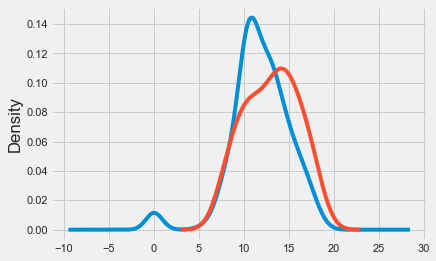

In [98]:
p.groupby('Mjob_health')['G3'].plot(kind='kde')

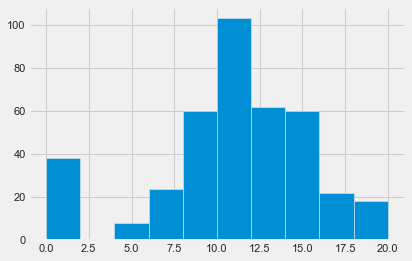

In [100]:
m.G3.hist()